# Proyek Analisis Data: Nama dataset
- Nama: Kurniati Laeli Munifah
- Email: k.laelimunifah@gmail.com
- Id Dicoding: klmunifah

## Impor dan Pemrosesan Awal Dataset
Dataset yang digunakan adalah dataset News_Category_Dataset_v3.json (https://www.kaggle.com/datasets/rmisra/news-category-dataset). File berformat JSON yang kemudian dibaca dengan menggunakan library pandas. Secara keseluruhan terdapat 209527 data pada masing masing kolom. Kolom yang digunakan adalah kolom headline dan category yang kemudian disimpan dalam tabel df. Terdapat 42 kategori dalam dataset ini. Akan tetapi, hanya 3 kategori yang digunakan yaitu Sports, Food & Drinks, dan Crime yang kemudian disimpan dalam news_df dengan total data ketiga kategori tersebut sebanyak 14979.

In [2]:
import pandas as pd

# Membaca dataset awal
df = pd.read_json('News_Category_Dataset_v3.json', lines=True)
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [3]:
# Mengecek dataset awal
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [4]:
# Menghapus kolom link, short_description, authors, dan date dari dataset awal sehingga dataset hanya berisi headline dan category
df = df.drop(columns=['link', 'short_description', 'authors', 'date'])
df.head()

,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS


In [5]:
# Menghitung jumlah data headline dari masing-masing category
df['category'].value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [6]:
# Membuat news_df sebagai dataset dengan category Sports, Food & Drink, dan Crime yang akan digunakan pada proyek.
news_df= df[df["category"].isin(['SPORTS', 'FOOD & DRINK', 'CRIME'])].reset_index()
news_df.head()

,index,headline,category
0,17,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS
1,26,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS
2,61,Boston Marathon To Make Race More Inclusive Fo...,SPORTS
3,62,"Anthony Varvaro, MLB Pitcher Turned Transit Co...",SPORTS
4,67,Carlos Alcaraz Wins U.S. Open For 1st Slam Tit...,SPORTS


In [7]:
# Mengecek jumlah dan tipe data news_df
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14979 entries, 0 to 14978
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     14979 non-null  int64 
 1   headline  14979 non-null  object
 2   category  14979 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.2+ KB


In [8]:
# Menghitung jumlah data headline news_df dari masing-masing category
news_df['category'].value_counts()

FOOD & DRINK    6340
SPORTS          5077
CRIME           3562
Name: category, dtype: int64

## Pemrosesan Lanjutan Data untuk Machine Learning
Dengan menggunakan library pandas, dilakukan one-hot-encoding data kategorikal. Hasil dari proses ini disimpan dalam dataframe baru news_new. Selanjutnya dilakukan proses perubahan nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values. Selanjutnya dilakukan pembagian data training dan data validation dengan menggunakan train_test_split pada library SKLearn menjadi 80% data training dan 20% data validation.

In [9]:
#  One-hot-encoding untuk data kategorikal dan membuat dataframe baru.
category = pd.get_dummies(news_df.category)
news_new = pd.concat([news_df, category], axis=1)
news_new = news_new.drop(columns='category')
news_new

,index,headline,CRIME,FOOD & DRINK,SPORTS
0,17,"Maury Wills, Base-Stealing Shortstop For Dodge...",0,0,1
1,26,"Las Vegas Aces Win First WNBA Title, Chelsea G...",0,0,1
2,61,Boston Marathon To Make Race More Inclusive Fo...,0,0,1
3,62,"Anthony Varvaro, MLB Pitcher Turned Transit Co...",0,0,1
4,67,Carlos Alcaraz Wins U.S. Open For 1st Slam Tit...,0,0,1
...,...,...,...,...,...
14974,209460,Thank You James Dolan and Time Warner,0,0,1
14975,209523,Maria Sharapova Stunned By Victoria Azarenka I...,0,0,1
14976,209524,"Giants Over Patriots, Jets Over Colts Among M...",0,0,1
14977,209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,0,0,1


In [10]:
# Mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values.

headline = news_new['headline'].values
category = news_new[[ 'SPORTS', 'FOOD & DRINK', 'CRIME']].values

In [11]:
#Membagi data menjadi 80% data training dan 20% data validation dengan menggunakan test_size 0.2

from sklearn.model_selection import train_test_split
headline_train, headline_val, category_train, category_val = train_test_split(headline, category, test_size=0.2)

# Tokenisasi headline
Tokenisasi dilakukan dengan menggunakan atribut Tokenizer pada Library TensorFlow Keras Preprocesing Text. Tokenisasi ini bertujuan untuk mengubah setiap kata menjadi sebuah angka. Dalam proyek ini ada 90000 kata yang dapat ditokenisasi dengan kata/object lain diubah menjadi 'x'. Token yang diperoleh berasal dari data training headline_train saja untuk menghindari overfitting machine learning.
Selanjutnya token tersebut diterapkan dengan menggunakan atribut texts_to_sequences pada data training headline_train dan dan data validation headline_val. Penerapan token ini akan menghasilkan sekuens angka angka token masing-masing headline. Selanjutnya, sekuens_train dan sekuens_val dirapikan dengan menggunakan fungsi pad_sequences. Parameter yang digunakan padding=post, maxlen 25, dan truncating post agar data sekuens yang digunakan hanya 25 data awal.

In [12]:
# Tokenisasi dan mengubahnya setiap sample jadi sekuens
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Mengartikan masing-masing kata menjadi token
tokenizer = Tokenizer(num_words=90000, oov_token='x')
tokenizer.fit_on_texts(headline_train)

# Menerapkan token ke data headline dan mengubahnya menjadi sekuens token
sekuens_train = tokenizer.texts_to_sequences(headline_train)
sekuens_val = tokenizer.texts_to_sequences(headline_val)

# Merapikan sekuens hasil tokenisasi
padded_train = pad_sequences(sekuens_train, padding='post', maxlen=25, truncating='post')
padded_val = pad_sequences(sekuens_val, padding='post', maxlen=25, truncating='post')

## Membuat dan Menguji Model Machine Learning menggunakan library TensorFlow
Proses yang pertama kali dilakukan adalah membuat model sekuensial. Model sekuensial yang digunakan pada proyek ini terdiri dari layer Embedding, LSTM, Dense dengan activation relu dan softmax, serta Dropout. Layer Embedding digunakan untuk mengelompokan kata yang memiliki kemiripan makna. Layer Embedding sebagai layer input menggunakan nilai input_dim sebesar 90000 yaitu jumlah token dan output_dim 25 sebesar panjang sekuens yang sudah dirapikan. Layer LSTM berguna untuk mengurutkan kata. Beberapa Layer Dense relu, Dropout bergantian merupakan hidden layer yang berisi algoritma dari ML. Sedangkan layer Dense softmax merupakan layer untuk output yang memiliki 3 jenis kategori.


Setelah model ML berhasil dibuat, model kemudian dicompile dengan menggunakan fungsi loss Categorical Crossentropy karena model multiclass categorical. Optimizer yang digunakan adalah Nadam yang menghitung Nesterov momentum. Model compile ini akan mengitung parameter accuracy.

Selanjutnya model ML dilatih dengan menggunakan fungsi fit sebanyak 50 kali epoch. Fungsi fit ini akan berhenti karena adanya Callback sudah mencapai accuracy training dan accuracy validation di atas 90%.
Model fit ini disimpan dalam variable history sehingga dapat ditampilkan dalam sebuah grafik Accuracy dan Loss dari data training dan data validation menggunakan library matplotlib.

In [28]:
# Membuat model Sekuensial
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=90000, output_dim=25),
    tf.keras.layers.LSTM(256),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [29]:
# Model Compile untuk multiclass categorical
model.compile(loss='categorical_crossentropy',optimizer='Nadam',metrics=['accuracy'])

In [30]:
# Membuat class callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90 and logs.get('val_accuracy')>0.90):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()


In [31]:
# Model Fit
history = model.fit(padded_train, category_train, epochs=50,
                    validation_data= (padded_val, category_val), callbacks=[callbacks], verbose=2)

Epoch 1/50
375/375 - 63s - loss: 0.6187 - accuracy: 0.7065 - val_loss: 0.4262 - val_accuracy: 0.8301 - 63s/epoch - 169ms/step
Epoch 2/50
375/375 - 52s - loss: 0.2873 - accuracy: 0.8987 - val_loss: 0.3548 - val_accuracy: 0.8845 - 52s/epoch - 137ms/step
Epoch 3/50
375/375 - 53s - loss: 0.1643 - accuracy: 0.9516 - val_loss: 0.3691 - val_accuracy: 0.8899 - 53s/epoch - 142ms/step
Epoch 4/50
375/375 - 53s - loss: 0.1293 - accuracy: 0.9680 - val_loss: 0.4208 - val_accuracy: 0.8842 - 53s/epoch - 142ms/step
Epoch 5/50
375/375 - 51s - loss: 0.0801 - accuracy: 0.9805 - val_loss: 0.3739 - val_accuracy: 0.8929 - 51s/epoch - 135ms/step
Epoch 6/50
375/375 - 52s - loss: 0.0576 - accuracy: 0.9869 - val_loss: 0.3188 - val_accuracy: 0.8929 - 52s/epoch - 138ms/step
Epoch 7/50
375/375 - 53s - loss: 0.0296 - accuracy: 0.9927 - val_loss: 0.6755 - val_accuracy: 0.8935 - 53s/epoch - 143ms/step
Epoch 8/50

Akurasi telah mencapai >90%!
375/375 - 51s - loss: 0.0311 - accuracy: 0.9915 - val_loss: 0.4687 - val_accu

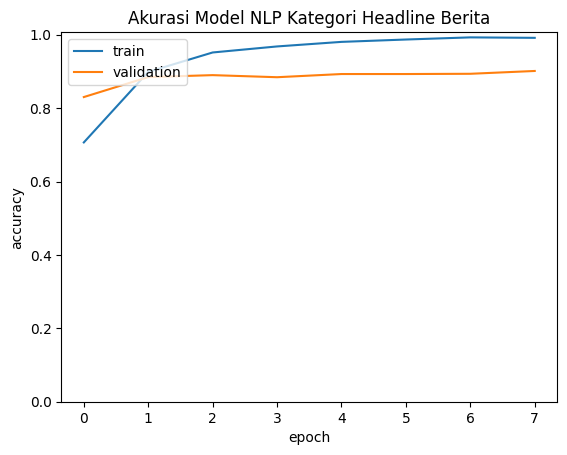

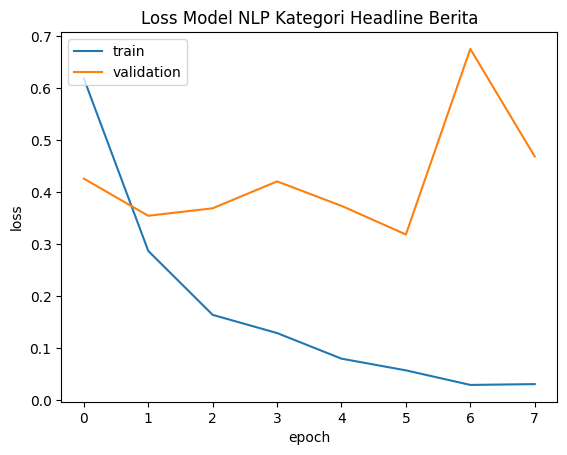

In [36]:
# Grafik
import matplotlib.pyplot as plt
# Grafik Akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model NLP Kategori Headline Berita')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(ymin=0)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Grafik Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model NLP Kategori Headline Berita')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
